## Prototype for the partial history test
Code runs in a script at partial_history.py

In [17]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, "./utils/")
import HH, Stimuli
from neuron import h
h.load_file("stdrun.hoc")
from neuron.units import mV, ms
import time

## Hyperparameters

In [3]:
num_input_patterns_per_n = 100
ns = [n for n in range(3,31)]
excitatory_interval = 5
inhibitory_interval = 15

num_histories = 250

data_dir = './data/partial_history/'

## Generate Stimuli

In [4]:
stimuli = {}

for n in ns:
    stimuli[n] = {}
    for pattern_ind in range(num_input_patterns_per_n):
        stimuli[n][pattern_ind] = Stimuli.excitatory_and_inhibitory_n(excitatory_interval, inhibitory_interval, n)

In [5]:
# write to file
'''
with open(data_dir + "stimuli.json", "w") as fout:
    fout.write(json.dumps(stimuli))
'''

'\nwith open(data_dir + "stimuli.json", "w") as fout:\n    fout.write(json.dumps(stimuli))\n'

## Generate Histories

In [6]:
stim_params = Stimuli.ExperimentalStimParams()

In [7]:
df_base, spikes, stims = HH.run_poisson_sim([stim_params.ex_base, stim_params.in_base])
df_lw, spikes, stims = HH.run_poisson_sim([stim_params.ex_lw, stim_params.in_lw])
df_lt, spikes, stims = HH.run_poisson_sim([stim_params.ex_lt, stim_params.in_lt])
df_lwlt, spikes, stims = HH.run_poisson_sim([stim_params.ex_lwlt, stim_params.in_lwlt])
df_burst, spikes, stims = HH.run_poisson_sim([stim_params.ex_burst, stim_params.in_burst])

In [29]:
df_base

{'t': [0.0,
  0.025,
  0.05,
  0.075,
  0.09999999999999999,
  0.12499999999999999,
  0.15,
  0.17500000000000002,
  0.20000000000000004,
  0.22500000000000006,
  0.25000000000000006,
  0.2750000000000001,
  0.3000000000000001,
  0.3250000000000001,
  0.35000000000000014,
  0.37500000000000017,
  0.4000000000000002,
  0.4250000000000002,
  0.45000000000000023,
  0.47500000000000026,
  0.5000000000000002,
  0.5250000000000001,
  0.55,
  0.575,
  0.5999999999999999,
  0.6249999999999998,
  0.6499999999999997,
  0.6749999999999996,
  0.6999999999999995,
  0.7249999999999994,
  0.7499999999999993,
  0.7749999999999992,
  0.7999999999999992,
  0.8249999999999991,
  0.849999999999999,
  0.8749999999999989,
  0.8999999999999988,
  0.9249999999999987,
  0.9499999999999986,
  0.9749999999999985,
  0.9999999999999984,
  1.0249999999999984,
  1.0499999999999983,
  1.0749999999999982,
  1.099999999999998,
  1.124999999999998,
  1.149999999999998,
  1.1749999999999978,
  1.1999999999999977,
  1.224

In [8]:
history_inds = np.random.randint(250, 400000-250, num_histories)
histories_base = np.array(
    [
        [df_base['v'][history_ind] for history_ind in history_inds],
        [df_base['m'][history_ind] for history_ind in history_inds],
        [df_base['h'][history_ind] for history_ind in history_inds],
        [df_base['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_lw = np.array(
    [
        [df_lw['v'][history_ind] for history_ind in history_inds],
        [df_lw['m'][history_ind] for history_ind in history_inds],
        [df_lw['h'][history_ind] for history_ind in history_inds],
        [df_lw['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_lt = np.array(
    [
        [df_lt['v'][history_ind] for history_ind in history_inds],
        [df_lt['m'][history_ind] for history_ind in history_inds],
        [df_lt['h'][history_ind] for history_ind in history_inds],
        [df_lt['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_lwlt = np.array(
    [
        [df_lwlt['v'][history_ind] for history_ind in history_inds],
        [df_lwlt['m'][history_ind] for history_ind in history_inds],
        [df_lwlt['h'][history_ind] for history_ind in history_inds],
        [df_lwlt['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_burst = np.array(
    [
        [df_burst['v'][history_ind] for history_ind in history_inds],
        [df_burst['m'][history_ind] for history_ind in history_inds],
        [df_burst['h'][history_ind] for history_ind in history_inds],
        [df_burst['n'][history_ind] for history_ind in history_inds],
    ]
)

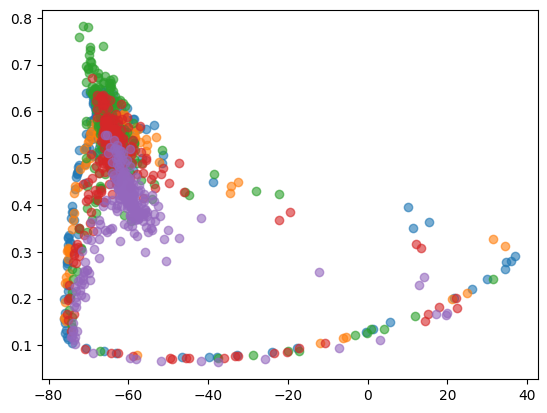

In [42]:
plt.scatter(histories_base[0], histories_base[2], alpha=0.6)
plt.scatter(histories_lw[0], histories_lw[2], alpha=0.6)
plt.scatter(histories_lt[0], histories_lt[2], alpha=0.6)
plt.scatter(histories_lwlt[0], histories_lwlt[2], alpha=0.6)
plt.scatter(histories_burst[0], histories_burst[2], alpha=0.6)

In [11]:
print(f'we run {28*1000*1000*5} simulations')

we run 140000000 simulations


In [12]:
histories_sets = {
    'base': histories_base,
    'lw': histories_lw,
    'lt': histories_lt,
    'lwlt': histories_lwlt,
    'burst': histories_burst
}

In [13]:
# write histories to file
'''
np.save(data_dir+'histories_base', histories_base)
np.save(data_dir+'histories_lw', histories_lw)
np.save(data_dir+'histories_lt', histories_lt)
np.save(data_dir+'histories_lwlt', histories_lwlt)
np.save(data_dir+'histories_burst', histories_burst)
'''

"\nnp.save(data_dir+'histories_base', histories_base)\nnp.save(data_dir+'histories_lw', histories_lw)\nnp.save(data_dir+'histories_lt', histories_lt)\nnp.save(data_dir+'histories_lwlt', histories_lwlt)\nnp.save(data_dir+'histories_burst', histories_burst)\n"

## Run Experiment

In [16]:
stim_scaffold = {
    'base': {
        'ex': Stimuli.PoissonStim(
            'ex_base', 'ex_base',
            interval=5,
            rev_potential=0,
            weight=0.0002,
            tau=2,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_base', 'in_base',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=6,
            seed='na'
        )
    },
    'lw': {
        'ex': Stimuli.PoissonStim(
            'ex_lw', 'ex_lw',
            interval=5,
            rev_potential=0,
            weight=0.00015,
            tau=2,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lw', 'in_lw',
            interval=15,
            rev_potential=-80,
            weight=0.0002,
            tau=6,
            seed='na'
        )
    },
    'lt': {
        'ex': Stimuli.PoissonStim(
            'ex_lt', 'ex_lt',
            interval=5,
            rev_potential=0,
            weight=0.0002,
            tau=10,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lt', 'in_lt',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=40,
            seed='na'
        )
    },
    'lwlt': {
        'ex': Stimuli.PoissonStim(
            'ex_lwlt', 'ex_lwlt',
            interval=5,
            rev_potential=0,
            weight=0.00015,
            tau=10,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lwlt', 'in_lwlt',
            interval=15,
            rev_potential=-80,
            weight=0.0002,
            tau=40,
            seed='na'
        )
    },
    'burst': {
        'ex': Stimuli.PoissonStim(
            'ex_burst', 'ex_burst',
            interval=5,
            rev_potential=0,
            weight=0.0001,
            tau=40,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_burst', 'in_burst',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=20,
            seed='na'
        )
    }
}

In [18]:
#for n in ns:
for n in [10]:
    print(f'running experiments with {n} inputs')
    #for pattern_ind in range(num_input_patterns_per_n):
    for pattern_ind in [50]:
        
        _stims = stimuli[n][pattern_ind]
        # run a bunch of cells in parallel
        stim_duration = max([t for stim_type, t in _stims]) # total duration of the stimuli
        
        _e_times = [t for stim_type, t in _stims if stim_type == 'e']
        _i_times = [t for stim_type, t in _stims if stim_type == 'i']
        
        cells = {}
        fInitializeHandlers = []
        
        print(f'setting up {len(histories_sets) * num_histories} cells')
        for stim_type in histories_sets:
            cells[stim_type] = {}
            for history_ind in range(num_histories):
                history = histories_sets[stim_type][:, history_ind]
                
                cells[stim_type][history_ind] = HH.HH()
                stim_scaffold[stim_type]['ex'].stim_times = _e_times
                stim_scaffold[stim_type]['in'].stim_times = _i_times
                cells[stim_type][history_ind].add_custom_stimulus(stim_scaffold[stim_type]['ex'])
                cells[stim_type][history_ind].add_custom_stimulus(stim_scaffold[stim_type]['in'])
                cells[stim_type][history_ind].sim_init(
                    v0 = history[0],
                    m0 = history[1],
                    h0 = history[2],
                    n0 = history[3]
                )
                fInitializeHandlers.append(h.FInitializeHandler(cells[stim_type][history_ind].do_sim_init))
                
        print(f'running simulation')
        h.finitialize(-65)
        h.continuerun(stim_duration + 20 * ms)
        print(f'simulation ended')
        print(f'recording results')
        for stim_type in histories_sets:
            results = []
            for history_ind in range(num_histories):
                nsts = [spike - stim_duration for spike in list(cells[stim_type][history_ind].spike_times)]
                nsts = [nst for nst in nsts if nst > 0]
                if len(nsts) < 1:
                    results.append(np.nan)
                else:
                    results.append(min(nsts))
            np.save(f'{data_dir}test_results/{stim_type}_{n}_{pattern_ind}', np.array(results))

running experiments with 10 inputs
setting up 1250 cells
running simulation
simulation ended
recording results


In [38]:
stim_type

'burst'

In [30]:
_stims

[('e', 0.0),
 ('i', 0.31929858853420257),
 ('i', 2.4115896024678705),
 ('e', 10.297286931608742),
 ('e', 12.877497130341048),
 ('i', 17.97814829667117),
 ('e', 20.283720600137762),
 ('e', 22.011271624389845),
 ('e', 24.39437566625626),
 ('e', 31.802597545386206)]

In [31]:
_e_times

[0.0,
 10.297286931608742,
 12.877497130341048,
 20.283720600137762,
 22.011271624389845,
 24.39437566625626,
 31.802597545386206]

In [43]:
stim_scaffold[stim_type]['ex'].stim_times

[0.0,
 10.297286931608742,
 12.877497130341048,
 20.283720600137762,
 22.011271624389845,
 24.39437566625626,
 31.802597545386206]

## Peak at output

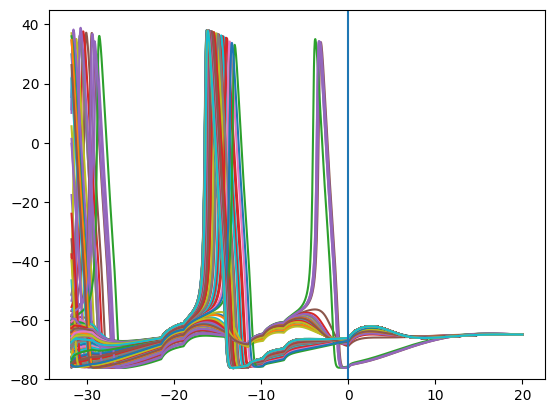

In [27]:
i = 0
for i in range(250):
    plt.plot(cells['base'][i]._t - stim_duration, cells['base'][i]._v)
plt.vlines(0, -100, 100)
plt.ylim(-80, 45)
plt.show()

In [81]:
# make sure the cell's initial history is set correctly

In [44]:
ind = 50

print(cells['base'][ind]._v[0])
print(cells['base'][ind]._m[0])
print(cells['base'][ind]._h[0])
print(cells['base'][ind]._n[0])

-66.37789146839428
0.04482458664557987
0.5758129120191775
0.324204532455308


In [45]:
histories_sets['base'][:,50]

array([-6.63778915e+01,  4.48245866e-02,  5.75812912e-01,  3.24204532e-01])

In [39]:
nsts

[]